In [1]:
#importing Required library 

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import  LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [2]:
#importing the datase 

data =pd.read_csv('framingham.csv')
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [4]:
data.isnull().sum() #checkinh null values 

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

<AxesSubplot:>

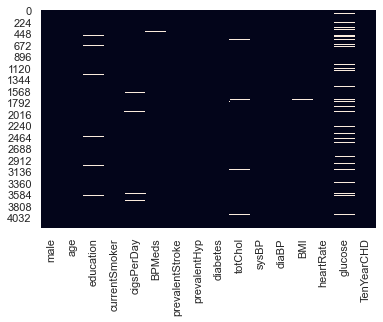

In [5]:
sns.heatmap(data.isnull(), cbar=False)

We can either delete those null value records or we can substitute those null values with the mean values of each column. So that we dont loose data.

In [6]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [7]:
# we are replacing the null values with 'mean()'

for value in ['education','BPMeds', 'totChol','glucose']:
    data[value].fillna(round(data[value].mean()), inplace= True)

In [8]:
#Removed Duplicate Rows
data.dropna(how='any',inplace=True)

In [9]:
data.isnull().sum() #checkinh null values 

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

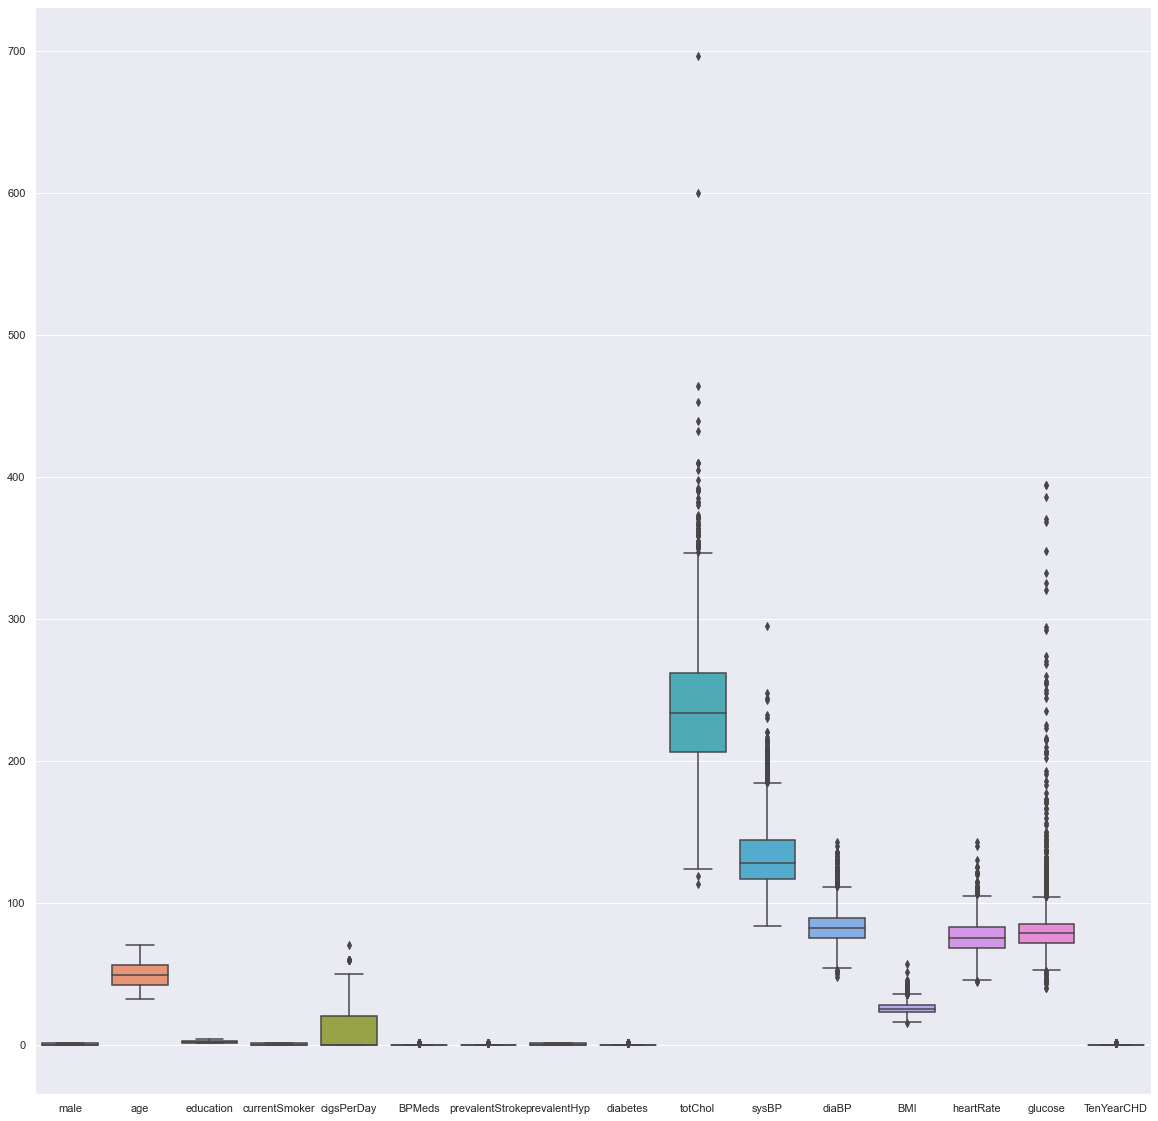

In [10]:
# To check for outliers, we are plotting a box-whisker plot.

plt.figure(figsize=(20,20), facecolor='w')
sns.boxplot(data=data)
plt.show()

array([[<AxesSubplot:title={'center':'male'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'education'}>,
        <AxesSubplot:title={'center':'currentSmoker'}>],
       [<AxesSubplot:title={'center':'cigsPerDay'}>,
        <AxesSubplot:title={'center':'BPMeds'}>,
        <AxesSubplot:title={'center':'prevalentStroke'}>,
        <AxesSubplot:title={'center':'prevalentHyp'}>],
       [<AxesSubplot:title={'center':'diabetes'}>,
        <AxesSubplot:title={'center':'totChol'}>,
        <AxesSubplot:title={'center':'sysBP'}>,
        <AxesSubplot:title={'center':'diaBP'}>],
       [<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'heartRate'}>,
        <AxesSubplot:title={'center':'glucose'}>,
        <AxesSubplot:title={'center':'TenYearCHD'}>]], dtype=object)

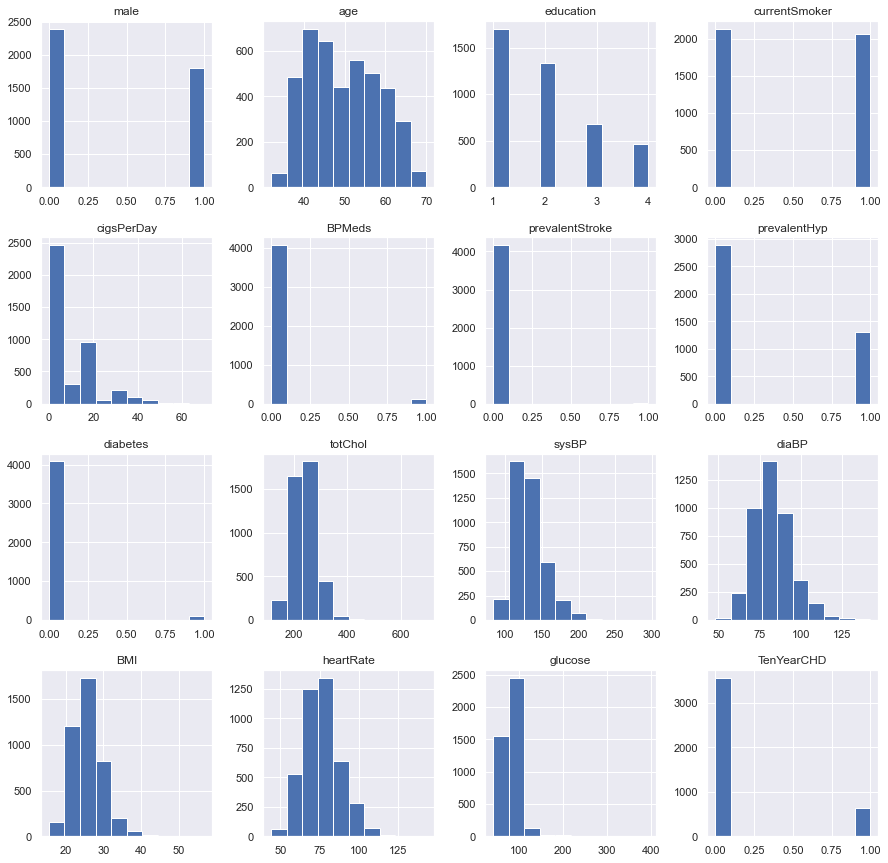

In [11]:
# let's see how data is distributed for every column

data.hist(figsize=(15,15))

C:\Users\Sagar Suraj Shirke\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Variable Distribution Age')

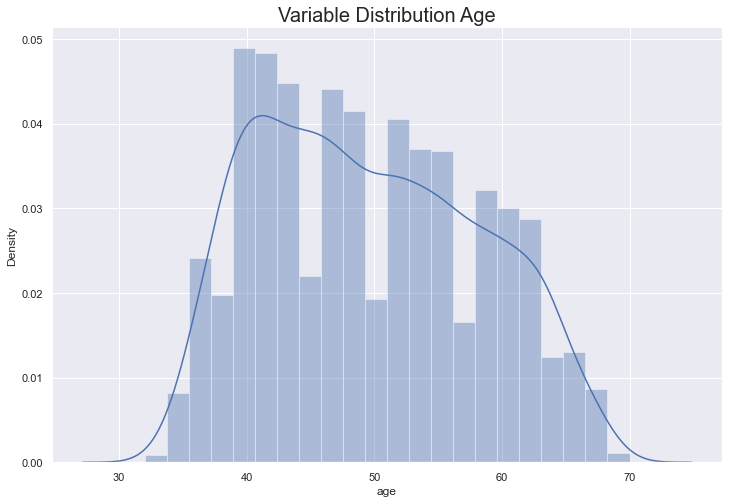

In [12]:
plt.figure(figsize=(12,8))
sns.distplot(data['age'])
plt.title('Variable Distribution Age', fontsize=20)

C:\Users\Sagar Suraj Shirke\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Variable distribution Cigarettes per Day')

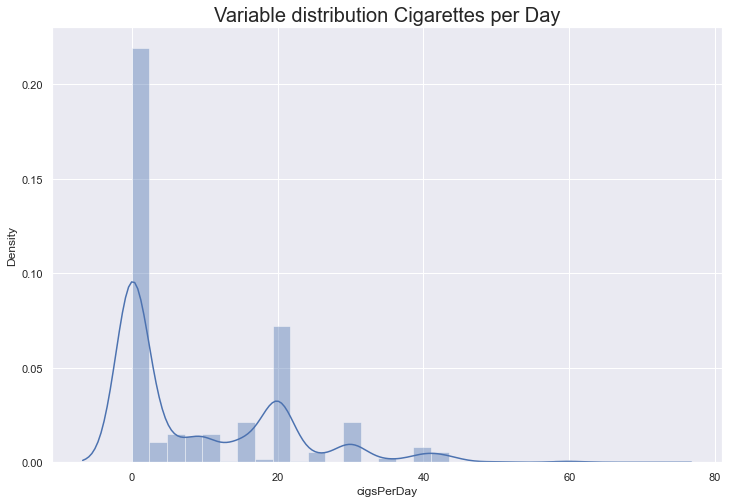

In [13]:
plt.figure(figsize=(12,8))
sns.distplot(data['cigsPerDay'])
plt.title('Variable distribution Cigarettes per Day', fontsize=20)

C:\Users\Sagar Suraj Shirke\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Variable distribution Systolic Blood Pressure')

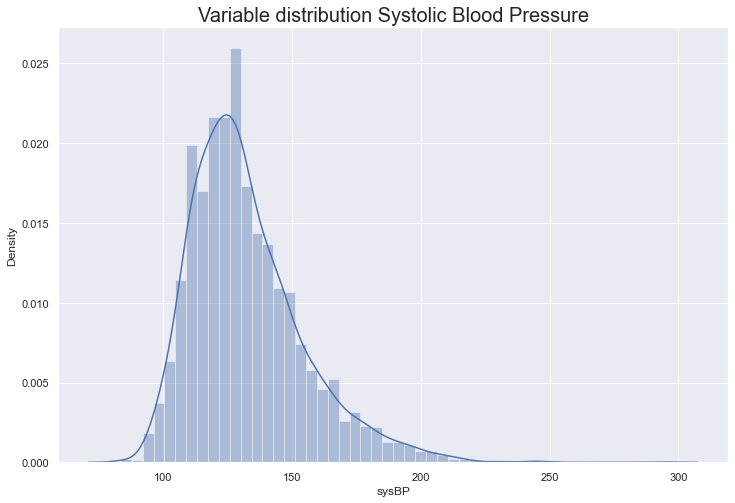

In [14]:
plt.figure(figsize=(12,8))
sns.distplot(data['sysBP'])
plt.title('Variable distribution Systolic Blood Pressure', fontsize=20)

C:\Users\Sagar Suraj Shirke\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Variable distribution Diastolic Blood Pressure')

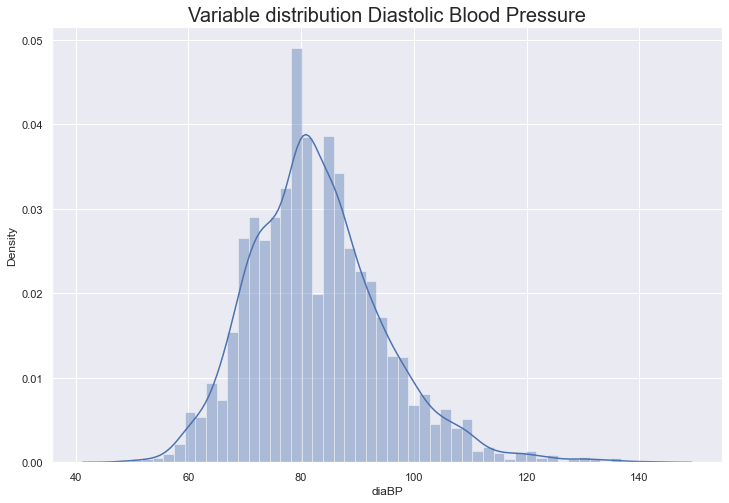

In [15]:
plt.figure(figsize=(12,8))
sns.distplot(data['diaBP'])
plt.title('Variable distribution Diastolic Blood Pressure', fontsize=20)

<AxesSubplot:title={'center':'Variable Distribution Education'}, xlabel='education', ylabel='count'>

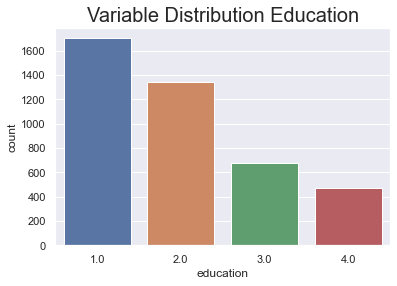

In [16]:
plt.title('Variable Distribution Education', fontsize=20)
sns.countplot(data=data, x='education')

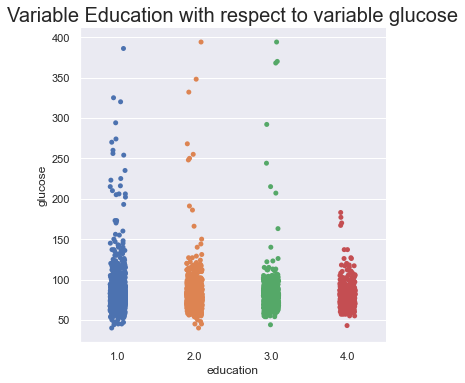

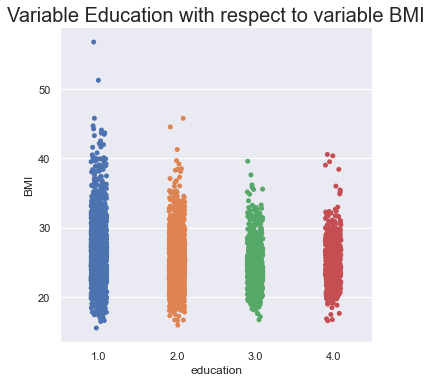

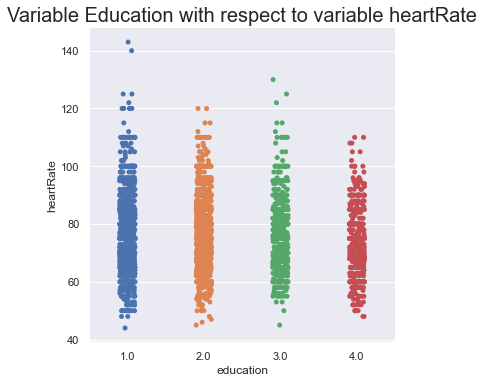

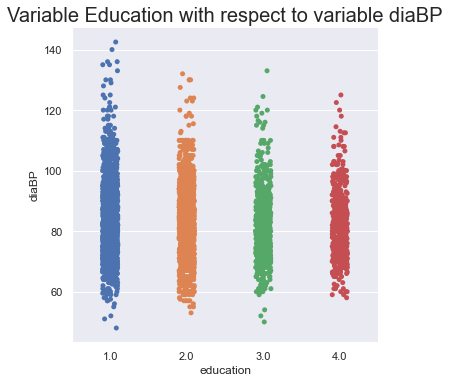

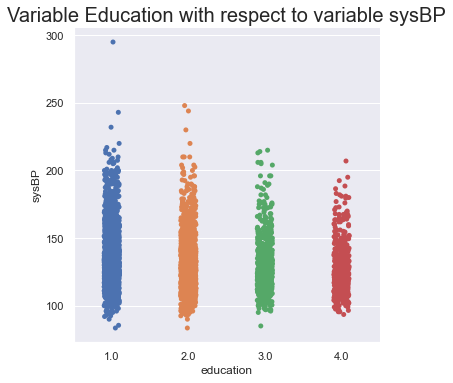

In [17]:
vectors = ['glucose', 'BMI', 'heartRate', 'diaBP', 'sysBP']

for vector in vectors:
    sns.catplot(data = data, x = 'education', y= vector)
    plt.title('Variable Education with respect to variable {}'.format(vector), fontsize=20)

It is observed that the higher the higher the level of education, the variables located in the vertical plane decrease slightly. Especially with BMI (Body Mass Index) and glucose levels.

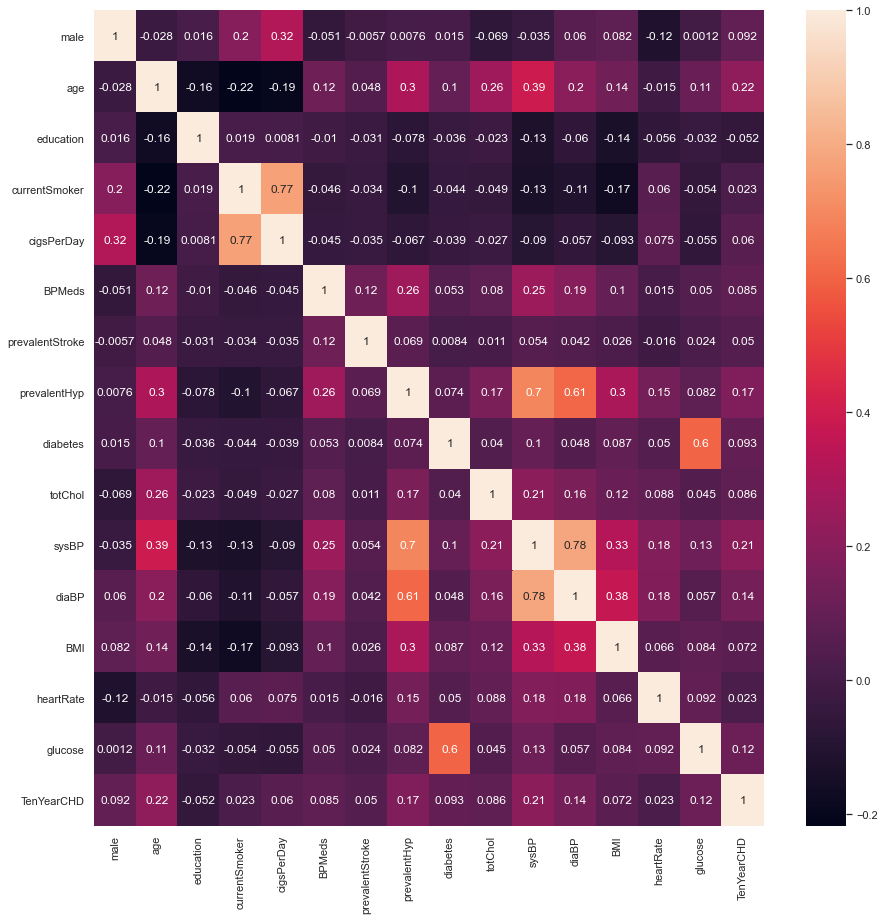

In [39]:
# checking which features are correlated with each other and are correlated with the outcome variable

plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [19]:
data.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.028397,0.016243,0.196414,0.316438,-0.050915,-0.005727,0.007582,0.015431,-0.069119,-0.034824,0.060488,0.082108,-0.116574,0.001209,0.091699
age,-0.028397,1.000000,-0.160939,-0.217035,-0.193668,0.120569,0.047819,0.304934,0.100786,0.263301,0.393216,0.203466,0.136076,-0.014517,0.113484,0.222498
education,0.016243,-0.160939,1.000000,0.018593,0.008111,-0.010491,-0.030550,-0.078492,-0.035748,-0.022924,-0.125871,-0.060333,-0.135728,-0.055827,-0.031889,-0.051698
currentSmoker,0.196414,-0.217035,0.018593,1.000000,0.769494,-0.046385,-0.034211,-0.104077,-0.044015,-0.048901,-0.133414,-0.111019,-0.169047,0.060171,-0.054018,0.022894
cigsPerDay,0.316438,-0.193668,0.008111,0.769494,1.000000,-0.045040,-0.034765,-0.066800,-0.038523,-0.027022,-0.089997,-0.057451,-0.093024,0.074557,-0.055479,0.059815
BPMeds,-0.050915,0.120569,-0.010491,-0.046385,-0.045040,1.000000,0.121029,0.259137,0.052506,0.080385,0.254966,0.193235,0.100399,0.015017,0.050059,0.084885
prevalentStroke,-0.005727,0.047819,-0.030550,-0.034211,-0.034765,0.121029,1.000000,0.068815,0.008447,0.011239,0.053976,0.041641,0.025989,-0.016360,0.023908,0.049994
prevalentHyp,0.007582,0.304934,-0.078492,-0.104077,-0.066800,0.259137,0.068815,1.000000,0.074452,0.165014,0.695545,0.613891,0.300314,0.146989,0.082334,0.174557
diabetes,0.015431,0.100786,-0.035748,-0.044015,-0.038523,0.052506,0.008447,0.074452,1.000000,0.039838,0.102133,0.047993,0.087345,0.049652,0.604921,0.092567
totChol,-0.069119,0.263301,-0.022924,-0.048901,-0.027022,0.080385,0.011239,0.165014,0.039838,1.000000,0.209563,0.164622,0.115742,0.088332,0.044695,0.085849


In [20]:
y = data['TenYearCHD'] #predict / dependent variable 
X =data.drop(columns = ['TenYearCHD']) #independent variables 

In [21]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [22]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)# training & testing 

In [23]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [24]:
y_pred = log_reg.predict(x_test)

In [25]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8540076335877863

In [26]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[882,   6],
       [147,  13]], dtype=int64)

In [27]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [28]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.8540076335877863

In [29]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.9932432432432432

In [30]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.8571428571428571

In [31]:
f1=2*((Precision * Recall )) /(Precision + Recall)

In [32]:
from sklearn.metrics import  roc_curve, roc_auc_score

In [33]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.5372466216216216

In [34]:
y_pred_prob = log_reg.predict_proba(x_test)

In [35]:
y_pred_prob

array([[0.61074944, 0.38925056],
       [0.79270497, 0.20729503],
       [0.90656052, 0.09343948],
       ...,
       [0.87167826, 0.12832174],
       [0.65332544, 0.34667456],
       [0.95735601, 0.04264399]])

In [36]:
y_pred_prob[:,1]

array([0.38925056, 0.20729503, 0.09343948, ..., 0.12832174, 0.34667456,
       0.04264399])

In [37]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])

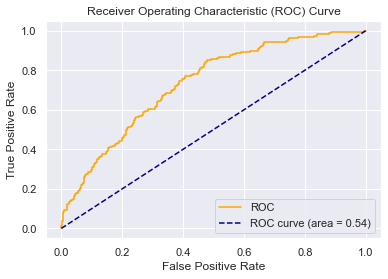

In [38]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()